# **Training the Deep Model**

***Importing libraries***

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os

***Creating Model   -- Adding convolutional and other layers --***

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3,3), 1, padding="same", activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

***Training the model***

In [ ]:
results = model.fit(train, epochs= 50, validation_data=val, batch_size=128)

Epoch 1/50
191/191 [==============================] - 1312s 7s/step - loss: 2.1657 - accuracy: 0.1947 - val_loss: 1.7296 - val_accuracy: 0.4057
Epoch 2/50
191/191 [==============================] - 70s 359ms/step - loss: 1.7950 - accuracy: 0.3388 - val_loss: 1.3795 - val_accuracy: 0.5405
Epoch 3/50
191/191 [==============================] - 73s 376ms/step - loss: 1.5592 - accuracy: 0.4262 - val_loss: 1.1643 - val_accuracy: 0.6354
Epoch 4/50
191/191 [==============================] - 73s 374ms/step - loss: 1.4234 - accuracy: 0.4800 - val_loss: 1.0212 - val_accuracy: 0.6991
Epoch 5/50
191/191 [==============================] - 73s 372ms/step - loss: 1.3155 - accuracy: 0.5200 - val_loss: 0.9612 - val_accuracy: 0.7182
Epoch 6/50
191/191 [==============================] - 71s 367ms/step - loss: 1.2031 - accuracy: 0.5589 - val_loss: 0.9006 - val_accuracy: 0.7338
Epoch 7/50
191/191 [==============================] - 75s 385ms/step - loss: 1.1048 - accuracy: 0.5985 - val_loss: 0.8337 - val_acc

***Saving the model for future uses***

In [ ]:
model.save(os.path.join("/content/drive/MyDrive/data", "fullmodelfirst.h5"))

### **Checking the loss and accuracy values**

In [ ]:
model.evaluate(test)

28/28 [==============================] - 34s 103ms/step - loss: 1.1452 - accuracy: 0.7556


[1.1451677083969116, 0.7556053996086121]

***Our loss value looks high. We will try to decrease this value in the hyperparameters part.***

***And the accuracy value could be little high. We are planning to increase this.***

### Loss Graph

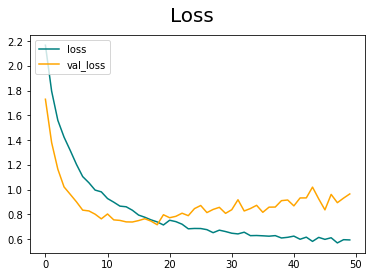

In [ ]:
fig = plt.figure()
plt.plot(results.history['loss'], color='teal', label='loss')
plt.plot(results.history['val_loss'], color='orange', label='val_loss')
                                
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                  

### Accuracy Graph

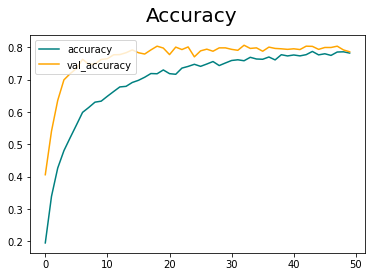

In [ ]:
fig = plt.figure()
plt.plot(results.history['accuracy'], color='teal', label='accuracy')
plt.plot(results.history['val_accuracy'], color='orange', label='val_accuracy')
                                
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                                    

***Testing with the data that we randomly downloaded from the internet. We converted it to its spectogram form. (It was a car horn sound) --just for double checking--***

In [ ]:
newimg = cv2.imread('/content/drive/MyDrive/test.png')
resize = tf.image.resize(newimg, (256,256))
grayimg = tf.image.rgb_to_grayscale(resize)

In [ ]:
yhat = model.predict(np.expand_dims(grayimg/255, 0))

In [ ]:
yhat

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.2819379e-31, 1.9160475e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.8469700e-26]], dtype=float32)

*As we can see, it predicted the class1 for %100 percent. And class1 was car horn class.*

# **Hyperparameter Options**

***We are going to increase dropout and change the activation function from relu to LeakyReLU***

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(64, (3,3), 1, padding="same", activation='LeakyReLU', input_shape=(256,256,1)))
model2.add(MaxPooling2D())

model2.add(Conv2D(64, (3,3), 1, padding="same", activation='LeakyReLU'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(64, activation='LeakyReLU'))
model2.add(Dropout(0.7))

model2.add(Dense(64, activation='LeakyReLU'))
model2.add(Dropout(0.7))


model2.add(Dense(10, activation='softmax'))

In [ ]:
train_size2 = int(len(data)*.7)
val_size2 = int(len(data)*.2) 
test_size2 = int(len(data)*.1) + 1

In [ ]:
train_size2 + val_size2 + test_size2

273

In [ ]:
train2 = data.take(train_size2)
val2 = data.skip(train_size2).take(val_size2)
test2 = data.skip(train_size2+val_size2).take(test_size2)

In [ ]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

***Training***

In [ ]:
results2 = model2.fit(train2, epochs= 50, validation_data=val2, batch_size=128)

Epoch 1/50
193/193 [==============================] - 87s 447ms/step - loss: 2.2595 - accuracy: 0.1242 - val_loss: 2.2358 - val_accuracy: 0.1897
Epoch 2/50
193/193 [==============================] - 65s 332ms/step - loss: 2.2256 - accuracy: 0.1430 - val_loss: 2.1471 - val_accuracy: 0.1886
Epoch 3/50
193/193 [==============================] - 64s 328ms/step - loss: 2.1843 - accuracy: 0.1597 - val_loss: 2.0716 - val_accuracy: 0.2434
Epoch 4/50
193/193 [==============================] - 72s 371ms/step - loss: 2.1371 - accuracy: 0.1818 - val_loss: 1.9860 - val_accuracy: 0.2873
Epoch 5/50
193/193 [==============================] - 74s 381ms/step - loss: 2.0852 - accuracy: 0.2073 - val_loss: 1.9152 - val_accuracy: 0.3580
Epoch 6/50
193/193 [==============================] - 69s 351ms/step - loss: 2.0454 - accuracy: 0.2296 - val_loss: 1.8978 - val_accuracy: 0.3777
Epoch 7/50
193/193 [==============================] - 75s 383ms/step - loss: 1.9793 - accuracy: 0.2458 - val_loss: 1.7755 - val_ac

***Testing the model and checking the graphs***

In [ ]:
model2.evaluate(test2)

23/23 [==============================] - 114s 4s/step - loss: 1.6135 - accuracy: 0.4809


[1.613547921180725, 0.48087432980537415]

***As we can see this makes things worse.***

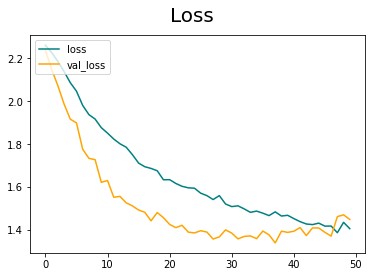

In [ ]:
fig = plt.figure()
plt.plot(results2.history['loss'], color='teal', label='loss')
plt.plot(results2.history['val_loss'], color='orange', label='val_loss')
                                
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                  

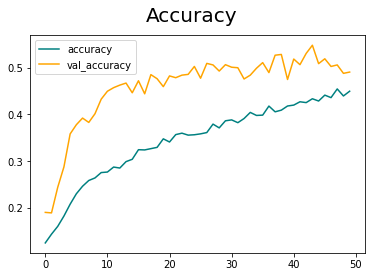

In [ ]:
fig = plt.figure()
plt.plot(results2.history['accuracy'], color='teal', label='accuracy')
plt.plot(results2.history['val_accuracy'], color='orange', label='val_accuracy')
                                
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                                    

***Maybe graphs seem like there is no overfit. However, our loss values are too high. Besides, our accuracy values are too small. We need to fix this.***

## **Hyperparamater Options #2**

***We will use the old activation function and the dropout value (relu function and 0.5 droput)***
  
***We are not touching the epochs due to the graphics that we saw above. It seems like 50 epochs are good for convergence for our dataset for now.***

***This time we are going to add 1 more convolutional layer and we will use 32 neurons for the first convolutional layer***

In [11]:
data2 = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/data/data", color_mode='grayscale', image_size=(256, 256), batch_size=32)

Found 8732 files belonging to 10 classes.


In [12]:
data2 =  data2.map(lambda x,y: (x/255, y))

In [13]:
len(data2)

273

In [14]:
train_size3 = int(len(data2)*.7) 
val_size3 = int(len(data2)*.2)
test_size3 = int(len(data2)*.1) + 1 

In [15]:
train_size3+val_size3+test_size3

273

In [16]:
train3 = data2.take(train_size3)
val3 = data2.skip(train_size3).take(val_size3)
test3 = data2.skip(train_size3+val_size3).take(test_size3)

In [30]:
model3 = Sequential()

***Adding convolutional layer***

In [31]:
model3.add(Conv2D(32, (3,3), 1, padding="same", activation='relu', input_shape=(256,256,1)))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(64, (3,3), 1, padding="same", activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(64, (3,3), 1, padding="same", activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
 
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))


model3.add(Dense(10, activation='softmax'))

In [32]:
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

***Training***

In [33]:
results3= model3.fit(train3, epochs= 50, validation_data=val3, batch_size=128)

Epoch 1/50
191/191 [==============================] - 59s 303ms/step - loss: 2.0735 - accuracy: 0.2313 - val_loss: 1.5673 - val_accuracy: 0.4531
Epoch 2/50
191/191 [==============================] - 56s 292ms/step - loss: 1.7231 - accuracy: 0.3665 - val_loss: 1.3043 - val_accuracy: 0.5764
Epoch 3/50
191/191 [==============================] - 59s 304ms/step - loss: 1.4720 - accuracy: 0.4638 - val_loss: 1.1215 - val_accuracy: 0.6863
Epoch 4/50
191/191 [==============================] - 57s 296ms/step - loss: 1.2619 - accuracy: 0.5317 - val_loss: 0.9287 - val_accuracy: 0.7350
Epoch 5/50
191/191 [==============================] - 57s 294ms/step - loss: 1.1382 - accuracy: 0.5852 - val_loss: 0.8076 - val_accuracy: 0.7610
Epoch 6/50
191/191 [==============================] - 57s 294ms/step - loss: 1.0313 - accuracy: 0.6360 - val_loss: 0.7668 - val_accuracy: 0.7633
Epoch 7/50
191/191 [==============================] - 57s 295ms/step - loss: 0.9298 - accuracy: 0.6538 - val_loss: 0.7080 - val_ac

***Saving the model***

In [35]:
model3.save(os.path.join("/content/drive/MyDrive/data", "fullmodellast.h5"))

***Testing the model and checking the graphs***

In [36]:
model3.evaluate(test3)

28/28 [==============================] - 318s 10s/step - loss: 0.8865 - accuracy: 0.8419


[0.8864737153053284, 0.841928243637085]

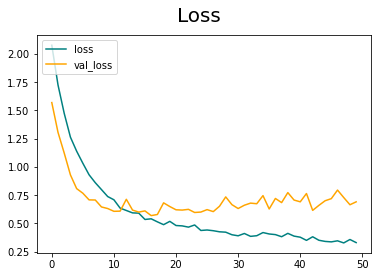

In [37]:
fig = plt.figure()
plt.plot(results3.history['loss'], color='teal', label='loss')
plt.plot(results3.history['val_loss'], color='orange', label='val_loss')
                                
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                  

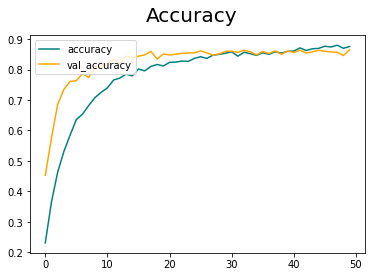

In [38]:
fig = plt.figure()
plt.plot(results3.history['accuracy'], color='teal', label='accuracy')
plt.plot(results3.history['val_accuracy'], color='orange', label='val_accuracy')
                                
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                                    

***As we can see, our model has become better than its predecessors.*** 
***However, we are wanting to make a one big final hyperparameter changing part***

## **Hyperparamater Options #3**

  ***In this section, we will change many parameters. In fact, the changes made in this section are the results of various inferences that we have tried and observed dozens of times before. Instead of showing all these changes one by one and prolonging it for nothing, all the changes will be applied at once and the model will be trained accordingly.***

 ***______________________________________________________________________________________________________________________________________________________________________***



*About the changes to be made in this section:*

**-- As we know, changing the batch size can have a positive impact on the model. Therefore, Firstly, we will change the batch size from 32 to 8**

**-- We will increase the validation data**

**-- We have decided to reduce the complexity of our model. Because we have realized that the validation data are not moving down after a while. We will do this dilution process by reducing the number of neurons in the convolutional layers. On top of that, instead of using two hidden layers, we will use a single hidden layer with more neurons.**
  
**-- At the same time, we will try to fix this validation data problem by reducing the learning rate parameter a little.**

**-- And finally, we will not use the batch_size parameter when fitting the model**

 ***______________________________________________________________________________________________________________________________________________________________________***
 
**NOTE: We could not increase the number of epochs due to the problems we had in google colab. Since we do not have any other gpu infrastructure, we preferred to be limited to 50 epochs.***



In [ ]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\sertac\Desktop\data", color_mode='grayscale', image_size=(256, 256), batch_size=8)

Found 8732 files belonging to 10 classes.


In [ ]:
data2 =  data2.map(lambda x,y: (x/255, y))

In [ ]:
len(data2)

1092

In [ ]:
train_size3 = int(len(data2)*.6) 
val_size3 = int(len(data2)*.2)
test_size3 = int(len(data2)*.15)

In [ ]:
train_size3+val_size3+test_size3

1092

In [ ]:
train3 = data2.take(train_size3)
val3 = data2.skip(train_size3).take(val_size3)
test3 = data2.skip(train_size3+val_size3).take(test_size3)

In [ ]:
model3 = Sequential()

In [ ]:
model3.add(Conv2D(16, (3,3), 1, padding="same", activation='relu', input_shape=(256,256,1)))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(32, (3,3), 1, padding="same", activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(16, (3,3), 1, padding="same", activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
 
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.8))


model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

***Training***

In [ ]:
results3 = model3.fit(train3, epochs= 50, validation_data=val3)

Epoch 1/50
698/698 [==============================] - 20s 27ms/step - loss: 1.9642 - accuracy: 0.2640 - val_loss: 1.3659 - val_accuracy: 0.5490
Epoch 2/50
698/698 [==============================] - 20s 29ms/step - loss: 1.6220 - accuracy: 0.4047 - val_loss: 1.2690 - val_accuracy: 0.6293
Epoch 3/50
698/698 [==============================] - 21s 31ms/step - loss: 1.4546 - accuracy: 0.4559 - val_loss: 0.9868 - val_accuracy: 0.7237
Epoch 4/50
698/698 [==============================] - 19s 27ms/step - loss: 1.3421 - accuracy: 0.5023 - val_loss: 0.9115 - val_accuracy: 0.7379
Epoch 5/50
698/698 [==============================] - 20s 28ms/step - loss: 1.2322 - accuracy: 0.5360 - val_loss: 0.8130 - val_accuracy: 0.7564
Epoch 6/50
698/698 [==============================] - 20s 28ms/step - loss: 1.1628 - accuracy: 0.5638 - val_loss: 0.7832 - val_accuracy: 0.7784
Epoch 7/50
698/698 [==============================] - 21s 30ms/step - loss: 1.0911 - accuracy: 0.5940 - val_loss: 0.7174 - val_accuracy:

***Testing the model and checking the graphs***

In [ ]:
model3.evaluate(test3)

218/218 [==============================] - 9s 11ms/step - loss: 0.7092 - accuracy: 0.8586


[0.7092058062553406, 0.8586207032203674]

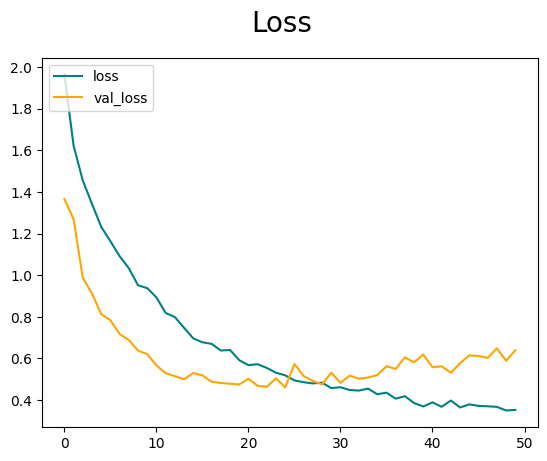

In [ ]:
fig = plt.figure()
plt.plot(results3.history['loss'], color='teal', label='loss')
plt.plot(results3.history['val_loss'], color='orange', label='val_loss')
                                
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()
                  

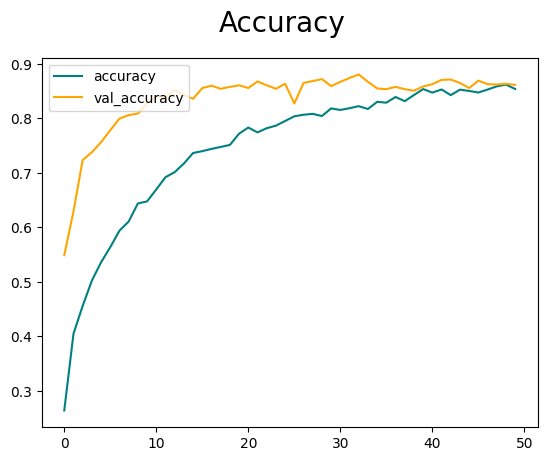

In [ ]:
fig = plt.figure()
plt.plot(results3.history['accuracy'], color='teal', label='accuracy')
plt.plot(results3.history['val_accuracy'], color='orange', label='val_accuracy')
                                
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

# **Conclusion**

**After long trials, we were able to stabilize the model up to a level. Maybe there are a few small details that we overlooked. Maybe we're missing out on this when we could have trained the model much better. However, at the end of the day, what we learned with this bootcamp remained with us and this information will be very useful in the future. Therefore, it will be beneficial for all of us to focus on what we have learned in this process rather than whether the model is good or bad.**